## Задание
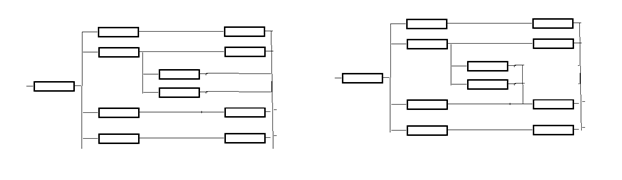

## Ход работы
$$\lambda = 10^{-4}$$
$$t=0.1..50000$$
$$p(t)=e^{-\lambda*t}$$
$$q(t)=1-p(t)$$


In [8]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [12]:
lmbd = 10**(-4)
t1 = 0.1
t2 = 50000

def p(t):
    return math.e ** (-lmbd * t)

def q(t):
    return 1 - p(t)

# Первая схема

## Формулы

### Параллельные переменные 

Рассчитаем функцию отказа одной переменной

1. Функция работоспособности одного элемента = $p(t)$
2. Функция отказа одного элемента = $1-p(t)$

Рассчитаем функцию отказа 2-х переменных

1. Функция отказа обоих элементов = $(1 - p(t))^2$
2. Функция работоспособности двух параллельных элементов = $1-(1-p(t))^2$

Рассчитаем функцию отказа для 3-х переменных

1. Функция работоспособности трех параллельных элементов = $1-(1-p(t))^3$
2. Функция отказа трех элементов = $(1 - p(t))^3$

### Последовательные переменные 

Рассчитаем функцию отказа одинаковых переменных

1. Функция работоспособности одного элемента = $p(t)$
2. Функция работоспособности двух элементов = $p(t)^2$

Рассчитаем функцию отказа разных переменных

2. Функция работоспособности двух элементов = $p(t)^2*(2-p(t))$


## Шаг 1

Заменим __параллельные__ элементы на один элемени с сохранением функции отказа:

![step1.png](step1.png)


## Шаг 2

Заменим __последовательные__ элементы на один элемени с сохранением функции отказа:

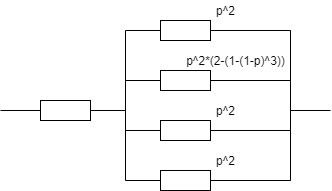


## Шаг 3

Снова заменим __параллельные__ элементы на один элемени с сохранением функции отказа:

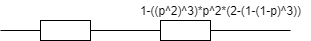

## Шаг 4

Снова заменим __последовательные__ элементы на один с сохранением функции отказа:

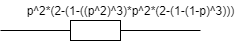

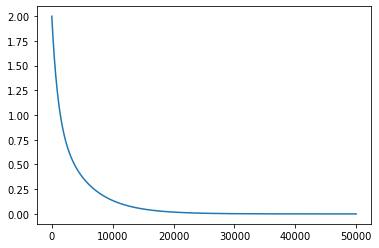

In [15]:
x = np.arange(t1, t2, 0.1)
y = p(x)**2 * ( 2 - ( 1 - ( (p(x)**2)**3 ) * p(x)**2 * ( 2 - ( 1 - ( 1 - p(x) )**3) ) ) )
plt.plot(x, y)
plt.show()

# Вторая схема

## Шаг 1

Заменим параллельные элементы на один элемени с сохранением функции отказа:

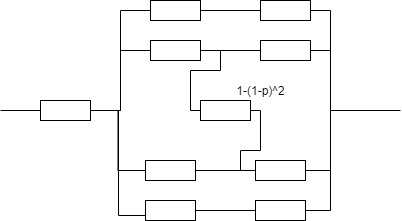

## Шаг 2

Заменим последовательные элементы на один элемени с сохранением функции отказа:

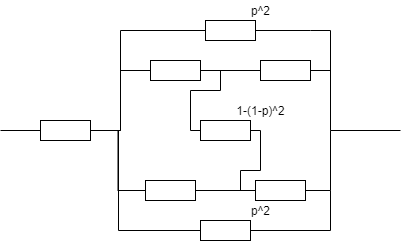

## Шаг 3

Заменим параллельные элементы на один элемени с сохранением функции отказа:

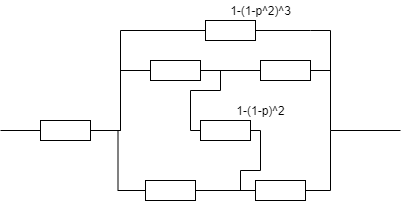

Для этой схемы больше нельзя сделать преобразований

# Метод декомпозиции

Воспользуемся методом декомпозиции для выделенной подсхемы:

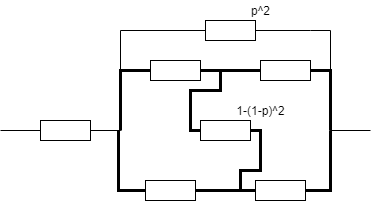


Разлодение мостиковой схемы относительно особого элемента:

$$ (1 - (1 - p)^2) * (1 - (1 - p)^2)^2 + (1 - (1 - (1 - p)^2)) * (1 - (1 - p^2)^2) = (1 - (1 - p)^2)^3 + (1 - p)^2 (1 - (1 - p^2)^2)$

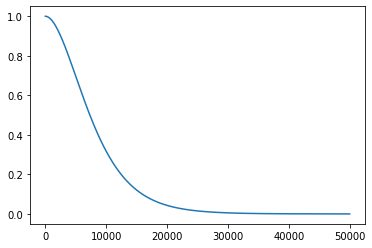

In [18]:
x1 = np.arange(t1, t2, 0.1)
y1 = (1 - (1 - p(x1) )**2)**3 + (1 - p(x1) )**2 * (1 - (1 - p(x1)**2)**2)
plt.plot(x1, y1)
plt.show()

# Метод минимальных путей

Минимальные пути:

## Путь 1

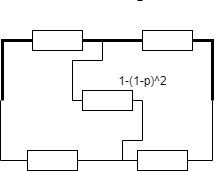

## Путь 2

![way2.png](way2.png)

## Путь 3

![way3.png](way3.png)

## Путь 4

![way4.png](way4.png)

Оценка пути 1: $ p ^ 2 $

Оценка пути 2: $ p ^ 2 * (1 - (1 - p)^2) $

Оценка пути 3: $ p ^ 2 * (1 - (1 - p)^2) $

Оценка пути 4: $ p ^ 2 $